**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4034.10 - Análisis de grandes volúmenes de datos**


Tecnológico de Monterrey


**Actividad 3**
Proyecto | Aprendizaje supervisado y no supervisado

**Alumno**

Isaid Posadas Oropeza A01795015


# Introducción teórica - Aprendizaje Supervisado y No Supervisado

## ¿En qué consiste el aprendizaje supervisado?
El aprendizaje supervisado es un enfoque del machine learning en el que se entrena un modelo utilizando datos que ya cuentan con una respuesta conocida. Es decir, cada ejemplo del conjunto de datos incluye una entrada y una salida esperada, lo que permite que el modelo aprenda a realizar predicciones precisas sobre nuevos datos.

### Características clave del aprendizaje supervisado
- **Etiquetas disponibles:** Cada ejemplo incluye su respectiva categoría o valor esperado.
- **Entrenamiento dirigido:** El modelo ajusta sus parámetros minimizando el error entre las predicciones y los valores reales.
- **Evaluación cuantitativa:** Se mide el rendimiento del modelo usando métricas como precisión, recall, exactitud y F1-score.

### Casos de uso frecuentes
- Clasificación de correos como spam o legítimos.
- Estimación del precio de propiedades.
- Reconocimiento de voz automatizado.
- Identificación de fraudes en operaciones financieras.
- Diagnóstico médico asistido por IA.

### Algoritmos supervisados en PySpark
- `DecisionTreeClassifier`: Árboles de decisión para tareas de clasificación.
- `RandomForestClassifier`: Bosques aleatorios para mejorar la precisión.
- `GBTClassifier`: Árboles potenciados con gradiente.
- `MultilayerPerceptronClassifier`: Red neuronal multicapa.
- `LogisticRegression`: Regresión logística para clasificación binaria o multiclase.
- `NaiveBayes`: Clasificador probabilístico basado en el teorema de Bayes.
- `LinearSVC`: Clasificador lineal basado en máquinas de soporte vectorial.
- `LinearRegression`: Modelo lineal para problemas de regresión.

---

## ¿Qué es el aprendizaje no supervisado?
El aprendizaje no supervisado se aplica cuando los datos no tienen etiquetas. El objetivo es descubrir patrones, agrupaciones o relaciones ocultas sin una guía explícita sobre qué debe aprender el modelo.

### Principales características
- **Sin etiquetas conocidas:** No se dispone de resultados esperados para cada dato.
- **Descubrimiento de estructuras:** El modelo identifica agrupaciones o regularidades ocultas.
- **Sin intervención directa:** La organización de los datos se realiza automáticamente.

### Aplicaciones comunes
- Segmentación de clientes según comportamiento.
- Agrupamiento de documentos por temas.
- Identificación de anomalías en datos financieros.
- Reducción de dimensiones (por ejemplo, PCA).
- Compresión de imágenes mediante agrupamiento.

### Algoritmos no supervisados en PySpark
- `KMeans`: Clustering en grupos mediante el método de las K medias.
- `GaussianMixture`: Modelos de mezcla de distribuciones gaussianas.
- `BisectingKMeans`: Variante jerárquica de KMeans.
- `PowerIterationClustering (PIC)`: Clustering basado en iteraciones de potencia.
- `Latent Dirichlet Allocation (LDA)`: Modelo de agrupamiento para análisis de texto.

---

## ¿Cuándo utilizar cada tipo de aprendizaje?
- Emplea **aprendizaje supervisado** cuando dispones de datos etiquetados y necesitas predecir salidas específicas.
- Usa **aprendizaje no supervisado** si tu conjunto de datos no está etiquetado y deseas explorar estructuras subyacentes.

---

## Referencias
1. **Apache Spark.** (2025). *DecisionTreeClassifier — PySpark 3.5.5 documentation*. Recuperado de [Apache Spark Documentation](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.DecisionTreeClassifier.html)
2. **Apache Spark.** (2025). *KMeans — PySpark 3.5.5 documentation*. Recuperado de [Apache Spark Documentation](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.clustering.KMeans.html)
3. **Apache Spark.** (2025). *Clustering - Spark 3.5.5 Documentation*. Recuperado de [Apache Spark Documentation](https://spark.apache.org/docs/latest/ml-clustering.html)
4. **Apache Spark.** (2025). *Classification and regression - Spark 3.5.5 Documentation*. Recuperado de [Apache Spark Documentation](https://spark.apache.org/docs/latest/ml-classification-regression.html)
5. **GeeksforGeeks.** (2025). *K-Means Clustering using PySpark Python*. Recuperado de [GeeksforGeeks](https://www.geeksforgeeks.org/k-means-clustering-using-pyspark-python/)


# Selección de los Datos

#### Descripción de la Base de Datos
Para esta actividad, utilizaremos la base de datos **E-Commerce Behavior Data**. Este dataset contiene información sobre eventos de interacción de usuarios con productos en una tienda en línea. Cada fila representa un evento específico realizado por un usuario, como:

- **view:** Visualización de un producto.
- **cart:** Producto agregado al carrito.
- **purchase:** Producto comprado.

#### Columnas principales del dataset:
- `event_time`: Fecha y hora del evento.
- `event_type`: Tipo de evento (view, cart, purchase).
- `product_id`: Identificador del producto.
- `category_code`: Categoría del producto.
- `brand`: Marca del producto.
- `price`: Precio del producto.
- `user_id`: Identificador del usuario.


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import os

# Crear la sesión de Spark con configuración personalizada
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("MySparkSession") \
    .config("spark.driver.memory", "16g") \
    .config("spark.executor.memory", "16g") \
    .config("spark.executor.memoryOverhead", "4g") \
    .config("spark.driver.maxResultSize", "4g") \
    .config("spark.local.dir", "/tmp/spark-temp") \
    .getOrCreate()

# Ruta del archivo CSV (ajustar según ubicación local)
dataset_path = '2019-Oct.csv'

# Validar que el archivo existe antes de cargarlo
if os.path.exists(dataset_path):
    # Cargar el archivo CSV en un DataFrame
    df = spark.read.csv(dataset_path, header=True, inferSchema=True)
    
    # Mostrar las primeras 5 filas sin truncar el contenido
    df.show(5, truncate=False)

    # Mostrar el número total de filas
    print(f"Total de filas en el dataset: {df.count()}")

else:
    print(f"Archivo no encontrado: {dataset_path}")
    
# Reducir los mensajes de log para evitar saturación en la consola
spark.sparkContext.setLogLevel("ERROR")

25/05/25 19:52:52 WARN Utils: Your hostname, Isaids-Mac-Studio.local resolves to a loopback address: 127.0.0.1; using 192.168.68.102 instead (on interface en1)
25/05/25 19:52:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/25 19:52:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/05/25 19:52:53 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).


+-------------------+----------+----------+-------------------+-----------------------------------+--------+-------+---------+------------------------------------+
|event_time         |event_type|product_id|category_id        |category_code                      |brand   |price  |user_id  |user_session                        |
+-------------------+----------+----------+-------------------+-----------------------------------+--------+-------+---------+------------------------------------+
|2019-09-30 19:00:00|view      |44600062  |2103807459595387724|NULL                               |shiseido|35.79  |541312140|72d76fde-8bb3-4e00-8c23-a032dfed738c|
|2019-09-30 19:00:00|view      |3900821   |2053013552326770905|appliances.environment.water_heater|aqua    |33.2   |554748717|9333dfbd-b87a-4708-9857-6336556b0fcc|
|2019-09-30 19:00:01|view      |17200506  |2053013559792632471|furniture.living_room.sofa         |NULL    |543.1  |519107250|566511c2-e2e3-422b-b695-cf8e6e792ca8|
|2019-09-30 19:0

Total de filas en el dataset: 42448764


#### **Visualización de las variables y características**

In [2]:
# Verificación del esquema del dataset

# Imprime la estructura del DataFrame, mostrando columnas y sus tipos de datos
df.printSchema()

# Obtiene una muestra aleatoria del 1% del dataset para tener una visión general de los registros
df.sample(fraction=0.01).show(10, truncate=False)

# Genera un resumen estadístico para las columnas numéricas del DataFrame
df.summary().show()

# Muestra la frecuencia de ocurrencia para cada tipo de evento registrado
df.groupBy("event_type").count().show()

# Muestra las 5 categorías más frecuentes dentro de la columna 'category_code'
df.groupBy("category_code").count().orderBy("count", ascending=False).show(5)

# Muestra las 5 marcas más comunes encontradas en la columna 'brand'
df.groupBy("brand").count().orderBy("count", ascending=False).show(5)


root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)

+-------------------+----------+----------+-------------------+--------------------------+----------+-------+---------+------------------------------------+
|event_time         |event_type|product_id|category_id        |category_code             |brand     |price  |user_id  |user_session                        |
+-------------------+----------+----------+-------------------+--------------------------+----------+-------+---------+------------------------------------+
|2019-09-30 19:00:46|view      |13500041  |2053013557099889147|furniture.bedroom.bed     |brw       |80.31  |555446365|7f0062d8-ead0-4e0a-96f6-43a0b7

+-------+----------+--------------------+--------------------+-------------------+--------+-----------------+-------------------+--------------------+
|summary|event_type|          product_id|         category_id|      category_code|   brand|            price|            user_id|        user_session|
+-------+----------+--------------------+--------------------+-------------------+--------+-----------------+-------------------+--------------------+
|  count|  42448764|            42448764|            42448764|           28933155|36335756|         42448764|           42448764|            42448762|
|   mean|      NULL|1.0549932375842676E7|2.057404237936260...|               NULL|     NaN|290.3236606848809|5.335371475081686E8|                NULL|
| stddev|      NULL|1.1881906970608136E7|1.843926466140411...|               NULL|     NaN|358.2691553394021|1.852373817465431E7|                NULL|
|    min|      cart|             1000978| 2053013552226107603|    accessories.bag|  a-case|   

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase|  742849|
|      view|40779399|
|      cart|  926516|
+----------+--------+



+--------------------+--------+
|       category_code|   count|
+--------------------+--------+
|                NULL|13515609|
|electronics.smart...|11507231|
|  electronics.clocks| 1311033|
|  computers.notebook| 1137623|
|electronics.video.tv| 1113750|
+--------------------+--------+
only showing top 5 rows



+-------+-------+
|  brand|  count|
+-------+-------+
|   NULL|6113008|
|samsung|5282775|
|  apple|4122554|
| xiaomi|3083763|
| huawei|1111205|
+-------+-------+
only showing top 5 rows



#### **Filtrado por particiones**

Reglas de particionamiento que se definieron en la actividad anterior:

In [3]:
# Agrupar y contar los registros por tipo de evento
event_type_counts = df.groupBy("event_type").count()
event_type_counts.show()

# Calcular la proporción de cada tipo de evento respecto al total de registros
total_events = df.count()
event_type_probabilities = (
    event_type_counts
    .withColumn("probability", col("count") / total_events)
)
event_type_probabilities.show()

# Filtrar el DataFrame para conservar únicamente los eventos de interés: 'view', 'cart' y 'purchase'
partitions = df.filter(
    (col("event_type") == "view") | 
    (col("event_type") == "cart") | 
    (col("event_type") == "purchase")
)

# Mostrar una muestra de los datos filtrados
partitions.show(10)


+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase|  742849|
|      view|40779399|
|      cart|  926516|
+----------+--------+



+----------+--------+--------------------+
|event_type|   count|         probability|
+----------+--------+--------------------+
|  purchase|  742849| 0.01749989705236176|
|      view|40779399|  0.9606734132470853|
|      cart|  926516|0.021826689700552883|
+----------+--------+--------------------+

+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|         event_time|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|
+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|2019-09-30 19:00:00|      view|  44600062|2103807459595387724|                NULL|shiseido|  35.79|541312140|72d76fde-8bb3-4e0...|
|2019-09-30 19:00:00|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|   33.2|554748717|9333dfbd-b87a-470...|
|2019-09-30 19:00:01|      view| 

### Análisis de eventos por partición

Mediante el filtrado del dataset según el tipo de evento, se identificaron tres acciones principales realizadas por los usuarios: **visualización de productos (view)**, **agregado al carrito (cart)** y **compra (purchase)**. La distribución observada para cada evento es la siguiente:

- **Visualización (view):** Representa aproximadamente el **96.07%** del total de eventos, lo cual sugiere que la mayoría de las interacciones de los usuarios se enfocan en explorar productos sin realizar acciones posteriores.

- **Agregado al carrito (cart):** Corresponde al **2.18%** de los registros, lo que refleja una intención de compra intermedia, donde los usuarios muestran interés pero aún no concretan la transacción.

- **Compra (purchase):** Constituye el **1.75%** de los eventos, lo que indica que solo una pequeña proporción de las visitas termina en una compra efectiva.

Estas proporciones reflejan un comportamiento común en plataformas de comercio electrónico, donde es habitual que la mayoría de los usuarios solo navegue entre los productos. Este análisis probabilístico permite aplicar técnicas de muestreo más precisas y representativas en las siguientes fases del estudio.


#### **Aplicación de la técnica de muestreo**

##### **Motivación para aplicar muestreo estratificado balanceado**

Se ha optado por el uso de muestreo estratificado balanceado en esta actividad por las siguientes razones clave:

---

#### 1. Diversidad dentro del conjunto de datos:
- El dataset está compuesto por distintos tipos de eventos (`view`, `cart` y `purchase`) que presentan una distribución inicial desigual.
- Cada tipo de evento refleja comportamientos distintos de los usuarios. Aplicar un muestreo aleatorio simple o proporcional podría reducir la representación de eventos menos frecuentes como `purchase`, afectando la precisión del análisis.
- El muestreo estratificado balanceado asegura que cada tipo de evento esté igualmente representado, evitando que una categoría predomine sobre las demás.

---

#### 2. Representación equilibrada:
- Este enfoque garantiza que todos los tipos de eventos estén presentes en proporciones iguales dentro de la muestra.
- Facilita una comparación justa entre categorías al reflejar adecuadamente sus características, lo que es crucial para un análisis confiable.
- Asegura que modelos supervisados no se inclinen hacia la clase más frecuente, manteniendo un entrenamiento justo y balanceado.

---

#### 3. Minimización del sesgo:
- Al segmentar el dataset en grupos equilibrados según el tipo de evento, se reduce el riesgo de sesgo que puede surgir en métodos de muestreo menos controlados.
- Se garantiza una mejor representación de eventos poco frecuentes, lo que permite obtener resultados más precisos y completos.

---

#### 4. Eficiencia computacional:
- Esta técnica permite controlar el tamaño de la muestra manteniendo una distribución equitativa sin comprometer la calidad de la información.
- Es especialmente útil en conjuntos de datos extensos, como en este caso, donde cada tipo de evento tiene características distintas que deben ser consideradas.

---

#### Comparativa frente a otros métodos:
- **Muestreo aleatorio simple:** Puede excluir eventos poco frecuentes, afectando negativamente al análisis.
- **Muestreo sistemático:** No asegura una representación uniforme si los datos no están ordenados equitativamente.
- **Muestreo por conglomerados:** No es adecuado aquí ya que los eventos no están organizados por grupos naturales.
- **Muestreo estratificado proporcional:** Aunque representa proporcionalmente, da demasiado peso a la clase dominante (`view`), lo que puede introducir sesgos.

---

#### Ventajas clave del muestreo estratificado balanceado en este contexto:
- Evita que modelos supervisados aprendan solo de la clase mayoritaria (`view`), aumentando la capacidad de clasificación de todas las clases.
- Mejora el rendimiento de modelos no supervisados como K-Means, permitiendo identificar patrones en todas las categorías.
- Asegura un análisis más robusto y equilibrado, sin favorecer a ninguna categoría en particular.


In [4]:
# Verificando la distribución original de eventos en el subconjunto filtrado
event_type_counts = partitions.groupBy("event_type").count()
event_type_counts.show()

# Determinando la cantidad mínima de registros entre las categorías (para balancear)
min_sample_size = min(row["count"] for row in event_type_counts.collect())
print(f"Tamaño de muestra balanceado por categoría: {min_sample_size}")

# Creando un DataFrame balanceado seleccionando la misma cantidad de registros de cada tipo de evento
balanced_df = (
    partitions.filter(col("event_type") == "view").limit(min_sample_size)
    .union(partitions.filter(col("event_type") == "cart").limit(min_sample_size))
    .union(partitions.filter(col("event_type") == "purchase").limit(min_sample_size))
)

# Confirmando el total de registros en la muestra y verificando el balance entre categorías
print("Total de eventos en la muestra balanceada:", balanced_df.count())
balanced_df.groupBy("event_type").count().show()


+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase|  742849|
|      view|40779399|
|      cart|  926516|
+----------+--------+



Tamaño de muestra balanceado por categoría: 742849


Total de eventos en la muestra balanceada: 2228547


+----------+------+
|event_type| count|
+----------+------+
|      view|742849|
|      cart|742849|
|  purchase|742849|
+----------+------+



#### **Efecto del muestreo estratificado balanceado**

La aplicación del muestreo estratificado balanceado permitió construir una muestra equitativa a partir del conjunto de datos original, asegurando una representación uniforme de los eventos `view`, `cart` y `purchase`. A diferencia del muestreo proporcional, esta técnica garantiza que cada categoría tenga el mismo número de observaciones, eliminando cualquier sesgo hacia la clase más frecuente y permitiendo un análisis más justo y comparativo entre las clases.


## Preparación de los datos


#### **Detección y depuración de valores nulos**

Como paso inicial en la preparación de los datos, se procede a identificar y eliminar los registros que contienen valores nulos en alguna de sus columnas. Esta depuración asegura que todas las observaciones incluidas en el análisis cuenten con información completa y confiable, lo cual es esencial para evitar inconsistencias o errores en las etapas posteriores del procesamiento.


In [5]:
from pyspark.sql.functions import col, sum

# Evaluar la presencia de valores nulos por columna en el DataFrame balanceado
balanced_df.select([
    sum(col(column).isNull().cast("int")).alias(column)
    for column in balanced_df.columns
]).show()

# Eliminar filas que contengan al menos un valor nulo en cualquier columna
balanced_df = balanced_df.na.drop()

# Confirmar el tamaño del DataFrame tras la limpieza
print(f"Total de eventos en la muestra balanceada después de eliminar valores nulos: {balanced_df.count()}")


+----------+----------+----------+-----------+-------------+------+-----+-------+------------+
|event_time|event_type|product_id|category_id|category_code| brand|price|user_id|user_session|
+----------+----------+----------+-----------+-------------+------+-----+-------+------------+
|         0|         0|         0|          0|       498466|183301|    0|      0|           1|
+----------+----------+----------+-----------+-------------+------+-----+-------+------------+



Total de eventos en la muestra balanceada después de eliminar valores nulos: 1660655


#### **Tratamiento de valores atípicos**

Los valores atípicos, también conocidos como outliers, son observaciones que se desvían considerablemente del rango típico de una variable. En esta etapa, se identificaron los outliers en la columna `price` utilizando los percentiles 1 y 99 como umbrales de referencia. Posteriormente, se eliminaron estas observaciones extremas con el objetivo de evitar que afecten negativamente la calidad del análisis y los resultados del modelo.


In [6]:
# Obtener los percentiles 1 y 99 para la columna 'price' usando una estimación aproximada
quantiles = balanced_df.approxQuantile("price", [0.01, 0.99], 0.05)
print(f"Rango de valores aceptables para 'price' (percentiles 1% - 99%): {quantiles}")

# Filtrar el DataFrame para conservar solo los registros dentro del rango interpercentil
balanced_df = balanced_df.filter(
    (col("price") >= quantiles[0]) & (col("price") <= quantiles[1])
)

# Confirmar el tamaño del conjunto tras eliminar los outliers
print(f"Total de eventos en la muestra balanceada después de eliminar valores atípicos: {balanced_df.count()}")


Rango de valores aceptables para 'price' (percentiles 1% - 99%): [0.88, 2574.07]


Total de eventos en la muestra balanceada después de eliminar valores atípicos: 1660655


#### **Conversión y ajuste de tipos de datos**

La correcta transformación de los tipos de datos es esencial para que los modelos interpreten correctamente cada variable. En esta fase del procesamiento:

- Se transformó la columna `event_time` al tipo `datetime`, lo que permite utilizarla en análisis basados en el tiempo.
- A partir de esta columna, se derivaron atributos adicionales como la fecha, la hora y el día de la semana.
- Se revisaron los tipos de todas las columnas del dataset para asegurar que sean consistentes con su propósito analítico y evitar errores en etapas posteriores.


In [7]:
from pyspark.sql.functions import to_timestamp, date_format, col

# Convertir la columna 'event_time' a tipo timestamp para facilitar análisis temporales
balanced_df = balanced_df.withColumn(
    "event_time_ts", to_timestamp(col("event_time"), "yyyy-MM-dd HH:mm:ss")
)

# Extraer componentes derivados del timestamp original
balanced_df = balanced_df.withColumn("event_date", date_format(col("event_time_ts"), "yyyy-MM-dd"))  # Fecha completa (año-mes-día)
balanced_df = balanced_df.withColumn("event_hour", date_format(col("event_time_ts"), "HH").cast("int"))  # Hora del día como entero
balanced_df = balanced_df.withColumn("event_day", date_format(col("event_time_ts"), "E"))  # Día de la semana en formato corto (Mon, Tue, etc.)

# Visualizar los resultados de la transformación para verificar que se hayan aplicado correctamente
balanced_df.select("event_time", "event_time_ts", "event_date", "event_hour", "event_day").show(5, truncate=False)


+-------------------+-------------------+----------+----------+---------+
|event_time         |event_time_ts      |event_date|event_hour|event_day|
+-------------------+-------------------+----------+----------+---------+
|2019-09-30 19:00:00|2019-09-30 19:00:00|2019-09-30|19        |Mon      |
|2019-09-30 19:00:01|2019-09-30 19:00:01|2019-09-30|19        |Mon      |
|2019-09-30 19:00:04|2019-09-30 19:00:04|2019-09-30|19        |Mon      |
|2019-09-30 19:00:05|2019-09-30 19:00:05|2019-09-30|19        |Mon      |
|2019-09-30 19:00:10|2019-09-30 19:00:10|2019-09-30|19        |Mon      |
+-------------------+-------------------+----------+----------+---------+
only showing top 5 rows



#### **Normalización o estandarización de variables numéricas (dos versiones)**

Para las variables numéricas, se aplicaron dos enfoques:
- **Versión 1 (Estandarizado):** La variable `price` fue estandarizada (media 0 y desviación estándar 1), ideal para el modelo no supervisado.
- **Versión 2 (Sin estandarizar):** La variable `price` se mantuvo en su escala original, ideal para el modelo supervisado.


In [8]:
from pyspark.ml.feature import StandardScaler, VectorAssembler

# Ensamblar la columna 'price' en un vector requerido por el escalador
assembler = VectorAssembler(inputCols=["price"], outputCol="price_vector")
balanced_df_scaled = assembler.transform(balanced_df)

# Configurar el escalador para aplicar estandarización (media = 0, desviación estándar = 1)
scaler = StandardScaler(
    inputCol="price_vector", 
    outputCol="price_scaled", 
    withMean=True, 
    withStd=True
)

# Ajustar el modelo de escalado y transformar los datos
scaler_model = scaler.fit(balanced_df_scaled)
balanced_df_scaled = scaler_model.transform(balanced_df_scaled)

# Verificar los resultados de la estandarización
print("Versión 1: Estandarizado")
balanced_df_scaled.select("price", "price_scaled").show(5, truncate=False)

# Crear una versión alternativa sin escalar eliminando las columnas derivadas
balanced_df_unscaled = balanced_df.drop("price_scaled", "price_vector")

# Visualizar la versión con la variable 'price' en su escala original
print("Versión 2: Sin estandarizar")
balanced_df_unscaled.select("price").show(5, truncate=False)


Versión 1: Estandarizado


+-------+---------------------+
|price  |price_scaled         |
+-------+---------------------+
|33.2   |[-0.8886985874316773]|
|251.74 |[-0.3062735655671705]|
|1081.98|[1.9063765220725668] |
|908.62 |[1.4443594918244156] |
|102.71 |[-0.7034493732383861]|
+-------+---------------------+
only showing top 5 rows

Versión 2: Sin estandarizar


+-------+
|price  |
+-------+
|33.2   |
|251.74 |
|1081.98|
|908.62 |
|102.71 |
+-------+
only showing top 5 rows



#### **Codificación de variables categóricas**

En esta etapa se realiza la transformación de variables categóricas a formato numérico, requisito indispensable para su utilización en modelos de aprendizaje automático. Para ello se emplea `StringIndexer` de PySpark, el cual asigna un valor numérico a cada categoría con base en su frecuencia dentro del dataset.

---

#### **Importancia de codificar las variables categóricas**
- Los algoritmos de machine learning no pueden operar directamente sobre datos en formato textual, por lo que es necesario convertir estas variables a representaciones numéricas.
- Las columnas categóricas tales como `event_type`, `category_code`, `event_day`, `event_hour`, `event_date`, `brand`, `product_id` y `user_id` deben ser codificadas para que el modelo pueda procesarlas correctamente.
- `StringIndexer` asigna los índices de forma ordenada según la frecuencia de cada categoría, siendo 0 el valor asignado a la categoría más común.

---

#### **Variables transformadas:**
- **`event_type` → `event_type_indexed`**: Tipo de interacción del usuario.
- **`event_day` → `event_day_indexed`**: Día de la semana en que ocurrió el evento.
- **`event_hour` → `event_hour_indexed`**: Hora del día del evento.
- **`event_date` → `event_date_indexed`**: Fecha específica del evento.
- **`category_code` → `category_indexed`**: Clasificación del producto.
- **`brand` → `brand_indexed`**: Marca del producto.
- **`product_id` → `product_indexed`**: Identificador único del producto.
- **`user_id` → `user_indexed`**: Identificador único del usuario.

---

#### **Aplicación según el tipo de modelo**
- **Versión 1 (Estandarizado):** Preparada para modelos no supervisados como K-Means, donde las distancias son clave.
- **Versión 2 (Sin estandarizar):** Dirigida a modelos supervisados como Decision Trees o Random Forest, donde la escala del atributo puede mantenerse sin afectaciones graves al rendimiento.


#### **Versión 1: Estandarizado**

In [9]:
from pyspark.ml.feature import StringIndexer

# Aplicar codificación numérica a las variables categóricas en el DataFrame balanceado y estandarizado

# Codificar la fecha del evento
event_date_indexer = StringIndexer(inputCol="event_date", outputCol="event_date_indexed")
balanced_df_scaled = event_date_indexer.fit(balanced_df_scaled).transform(balanced_df_scaled)

# Codificar la hora del evento
event_hour_indexer = StringIndexer(inputCol="event_hour", outputCol="event_hour_indexed")
balanced_df_scaled = event_hour_indexer.fit(balanced_df_scaled).transform(balanced_df_scaled)

# Codificar el día de la semana
event_day_indexer = StringIndexer(inputCol="event_day", outputCol="event_day_indexed")
balanced_df_scaled = event_day_indexer.fit(balanced_df_scaled).transform(balanced_df_scaled)

# Codificar el tipo de evento (view, cart, purchase)
event_type_indexer = StringIndexer(inputCol="event_type", outputCol="event_type_indexed")
balanced_df_scaled = event_type_indexer.fit(balanced_df_scaled).transform(balanced_df_scaled)

# Codificar la categoría del producto
category_indexer = StringIndexer(inputCol="category_code", outputCol="category_indexed")
balanced_df_scaled = category_indexer.fit(balanced_df_scaled).transform(balanced_df_scaled)

# Codificar la marca del producto
brand_indexer = StringIndexer(inputCol="brand", outputCol="brand_indexed")
balanced_df_scaled = brand_indexer.fit(balanced_df_scaled).transform(balanced_df_scaled)

# Codificar el ID del producto
product_indexer = StringIndexer(inputCol="product_id", outputCol="product_indexed")
balanced_df_scaled = product_indexer.fit(balanced_df_scaled).transform(balanced_df_scaled)

# Codificar el ID del usuario
user_indexer = StringIndexer(inputCol="user_id", outputCol="user_indexed")
balanced_df_scaled = user_indexer.fit(balanced_df_scaled).transform(balanced_df_scaled)

# Mostrar una muestra de las variables originales y sus versiones codificadas
balanced_df_scaled.select(
    "event_date", "event_date_indexed",
    "event_hour", "event_hour_indexed",
    "event_day", "event_day_indexed",
    "event_type", "event_type_indexed",
    "category_code", "category_indexed",
    "brand", "brand_indexed",
    "product_id", "product_indexed",
    "user_id", "user_indexed"
).show(5, truncate=False)


+----------+------------------+----------+------------------+---------+-----------------+----------+------------------+-----------------------------------+----------------+------+-------------+----------+---------------+---------+------------+
|event_date|event_date_indexed|event_hour|event_hour_indexed|event_day|event_day_indexed|event_type|event_type_indexed|category_code                      |category_indexed|brand |brand_indexed|product_id|product_indexed|user_id  |user_indexed|
+----------+------------------+----------+------------------+---------+-----------------+----------+------------------+-----------------------------------+----------------+------+-------------+----------+---------------+---------+------------+
|2019-09-30|1.0               |19        |21.0              |Mon      |1.0              |view      |2.0               |appliances.environment.water_heater|20.0            |aqua  |120.0        |3900821   |1082.0         |554748717|162019.0    |
|2019-09-30|1.0         

#### **Versión 2: Sin estandarizar**

In [10]:
from pyspark.ml.feature import StringIndexer

# Codificación de variables categóricas para el DataFrame no estandarizado (versión supervisada)

# Codificar la fecha del evento (formato string → índice numérico)
event_date_indexer = StringIndexer(inputCol="event_date", outputCol="event_date_indexed")
balanced_df_unscaled = event_date_indexer.fit(balanced_df_unscaled).transform(balanced_df_unscaled)

# Codificar la hora del evento
event_hour_indexer = StringIndexer(inputCol="event_hour", outputCol="event_hour_indexed")
balanced_df_unscaled = event_hour_indexer.fit(balanced_df_unscaled).transform(balanced_df_unscaled)

# Codificar el día de la semana
event_day_indexer = StringIndexer(inputCol="event_day", outputCol="event_day_indexed")
balanced_df_unscaled = event_day_indexer.fit(balanced_df_unscaled).transform(balanced_df_unscaled)

# Codificar el tipo de evento
event_type_indexer = StringIndexer(inputCol="event_type", outputCol="event_type_indexed")
balanced_df_unscaled = event_type_indexer.fit(balanced_df_unscaled).transform(balanced_df_unscaled)

# Codificar la categoría del producto
category_indexer = StringIndexer(inputCol="category_code", outputCol="category_indexed")
balanced_df_unscaled = category_indexer.fit(balanced_df_unscaled).transform(balanced_df_unscaled)

# Codificar la marca del producto
brand_indexer = StringIndexer(inputCol="brand", outputCol="brand_indexed")
balanced_df_unscaled = brand_indexer.fit(balanced_df_unscaled).transform(balanced_df_unscaled)

# Codificar el identificador del producto
product_indexer = StringIndexer(inputCol="product_id", outputCol="product_indexed")
balanced_df_unscaled = product_indexer.fit(balanced_df_unscaled).transform(balanced_df_unscaled)

# Codificar el identificador del usuario
user_indexer = StringIndexer(inputCol="user_id", outputCol="user_indexed")
balanced_df_unscaled = user_indexer.fit(balanced_df_unscaled).transform(balanced_df_unscaled)

# Mostrar una muestra con las columnas originales y sus correspondientes versiones codificadas
balanced_df_unscaled.select(
    "event_date", "event_date_indexed",
    "event_hour", "event_hour_indexed",
    "event_day", "event_day_indexed",
    "event_type", "event_type_indexed",
    "category_code", "category_indexed",
    "brand", "brand_indexed",
    "product_id", "product_indexed",
    "user_id", "user_indexed"
).show(5, truncate=False)


+----------+------------------+----------+------------------+---------+-----------------+----------+------------------+-----------------------------------+----------------+------+-------------+----------+---------------+---------+------------+
|event_date|event_date_indexed|event_hour|event_hour_indexed|event_day|event_day_indexed|event_type|event_type_indexed|category_code                      |category_indexed|brand |brand_indexed|product_id|product_indexed|user_id  |user_indexed|
+----------+------------------+----------+------------------+---------+-----------------+----------+------------------+-----------------------------------+----------------+------+-------------+----------+---------------+---------+------------+
|2019-09-30|1.0               |19        |21.0              |Mon      |1.0              |view      |2.0               |appliances.environment.water_heater|20.0            |aqua  |120.0        |3900821   |1082.0         |554748717|162019.0    |
|2019-09-30|1.0         

#### **Separación del conjunto de datos en entrenamiento y prueba**

En esta etapa se realiza la partición del dataset en dos subconjuntos:

- **Conjunto de entrenamiento (80%)**: Se utiliza para ajustar los parámetros del modelo y aprender patrones a partir de los datos disponibles.
- **Conjunto de prueba (20%)**: Se reserva para validar el rendimiento del modelo con datos que no han sido vistos durante el entrenamiento.

---

#### **Importancia de esta separación**
- **Entrenamiento (80%)**: Permite al modelo aprender relaciones y comportamientos presentes en los datos.
- **Prueba (20%)**: Evalúa la capacidad del modelo para generalizar a nuevos casos.
- **Prevención del sobreajuste (overfitting)**: Garantiza que el modelo no memorice los datos, sino que sea capaz de aplicar lo aprendido a datos desconocidos.

---

#### **Estrategia utilizada**
- Se aplica el método `randomSplit()` de PySpark, que divide el dataset aleatoriamente según proporciones especificadas.
- Esta técnica se aplica sobre ambas versiones del dataset:
  - **Versión 1 (Estandarizada)**: `balanced_df_scaled`, diseñada para el modelo no supervisado (como K-Means).
  - **Versión 2 (Sin estandarizar)**: `balanced_df_unscaled`, utilizada en modelos supervisados como Árboles de Decisión y Random Forest.


In [11]:
# Definir las proporciones de división para entrenamiento y prueba
train_fraction = 0.8
test_fraction = 0.2

# Dividir el dataset estandarizado (versión para modelos no supervisados)
train_scaled, test_scaled = balanced_df_scaled.randomSplit([train_fraction, test_fraction], seed=42)

print("Versión 1: Dataset estandarizado")
print(f"Filas de entrenamiento: {train_scaled.count()}")
print(f"Filas de prueba: {test_scaled.count()}")

# Dividir el dataset sin estandarizar (versión para modelos supervisados)
train_unscaled, test_unscaled = balanced_df_unscaled.randomSplit([train_fraction, test_fraction], seed=42)

print("\nVersión 2: Dataset sin estandarizar")
print(f"Filas de entrenamiento: {train_unscaled.count()}")
print(f"Filas de prueba: {test_unscaled.count()}")

# Verificar la distribución de clases en los conjuntos de entrenamiento y prueba - Versión estandarizada
print("\nDistribución de tipos de evento en el conjunto de entrenamiento (Estandarizado)")
train_scaled.groupBy("event_type").count().show()

print("\nDistribución de tipos de evento en el conjunto de prueba (Estandarizado)")
test_scaled.groupBy("event_type").count().show()

# Verificar la distribución de clases en los conjuntos de entrenamiento y prueba - Versión sin escalar
print("\nDistribución de tipos de evento en el conjunto de entrenamiento (Sin estandarizar)")
train_unscaled.groupBy("event_type").count().show()

print("\nDistribución de tipos de evento en el conjunto de prueba (Sin estandarizar)")
test_unscaled.groupBy("event_type").count().show()


Versión 1: Dataset estandarizado


Filas de entrenamiento: 1328522


Filas de prueba: 332133

Versión 2: Dataset sin estandarizar


Filas de entrenamiento: 1328522


Filas de prueba: 332133

Distribución de tipos de evento en el conjunto de entrenamiento (Estandarizado)


+----------+------+
|event_type| count|
+----------+------+
|      view|370821|
|      cart|518038|
|  purchase|439663|
+----------+------+


Distribución de tipos de evento en el conjunto de prueba (Estandarizado)


+----------+------+
|event_type| count|
+----------+------+
|      view| 92857|
|      cart|129432|
|  purchase|109844|
+----------+------+


Distribución de tipos de evento en el conjunto de entrenamiento (Sin estandarizar)


+----------+------+
|event_type| count|
+----------+------+
|      view|370821|
|      cart|518038|
|  purchase|439663|
+----------+------+


Distribución de tipos de evento en el conjunto de prueba (Sin estandarizar)


+----------+------+
|event_type| count|
+----------+------+
|      view| 92857|
|      cart|129432|
|  purchase|109844|
+----------+------+



#### Observaciones:
- Las proporciones entre las categorías (`view`, `cart`, `purchase`) se conservaron de forma consistente en los conjuntos de entrenamiento y prueba, tanto en la versión estandarizada como en la no estandarizada del dataset.
- Esta uniformidad en la distribución garantiza que el modelo tenga acceso equilibrado a todas las clases durante el entrenamiento y pueda generalizar correctamente al momento de ser evaluado con nuevos datos.


## **Desarrollo de modelos de aprendizaje supervisado y no supervisado**

En esta etapa se implementarán dos enfoques de machine learning:

- **Modelo supervisado:** Árbol de decisión, utilizando el conjunto de datos sin estandarizar.
- **Modelo no supervisado:** Algoritmo de K-Means, aplicado sobre el conjunto de datos estandarizado.

### Propósitos de cada modelo:

- **Árbol de decisión (modelo supervisado):** Su objetivo es predecir el tipo de evento (`event_type`), clasificando las instancias en una de las tres clases: `view`, `cart` o `purchase`.
  
- **K-Means (modelo no supervisado):** Busca identificar patrones naturales en los datos mediante agrupamiento, formando clusters a partir de las variables numéricas seleccionadas sin conocer previamente las etiquetas.


### Justificación de los modelos seleccionados

Para esta actividad se eligieron tres modelos de aprendizaje automático, adecuados tanto por la naturaleza de los datos como por los objetivos del análisis planteado.

---

### 1. Modelo supervisado: Árbol de Decisión

#### Razonamiento detrás de la elección:
- Es un algoritmo sencillo de interpretar, que permite entender fácilmente cómo las variables influyen en la clasificación.
- Tiene la ventaja de no requerir escalado de las variables, lo que lo hace ideal para trabajar con datos en su escala original.
- Su estructura lógica y jerárquica facilita la visualización del proceso de decisión del modelo.

#### Variable objetivo:
- **`event_type_indexed`**: Representa el tipo de evento a predecir:
  - `0.0`: visualización (`view`)
  - `1.0`: agregado al carrito (`cart`)
  - `2.0`: compra (`purchase`)

#### Variables predictoras:
- `price`
- `category_indexed`
- `brand_indexed`
- `hour_indexed`
- `day_indexed`
- `date_indexed`

---

### 2. Modelo supervisado: Random Forest

#### Razonamiento detrás de la elección:
- Es un modelo de conjunto (ensemble) que combina múltiples árboles de decisión, lo que mejora su capacidad de generalización y precisión.
- Reduce el riesgo de sobreajuste al promediar múltiples modelos individuales.
- Puede manejar variables no escaladas y es robusto ante datos ruidosos.

#### Variable objetivo:
- **`event_type_indexed`** (igual que en el árbol de decisión)

#### Variables predictoras:
- `price`
- `category_indexed`
- `brand_indexed`
- `hour_indexed`
- `day_indexed`
- `date_indexed`

---

### 3. Modelo no supervisado: K-Means

#### Razonamiento detrás de la elección:
- Es un algoritmo eficiente y ampliamente utilizado para identificar agrupamientos naturales dentro de los datos.
- Permite descubrir patrones y similitudes entre eventos sin necesidad de conocer previamente sus etiquetas.
- Requiere que los datos estén estandarizados para que las distancias entre puntos sean comparables.

#### Variables utilizadas para el agrupamiento:
- `price`
- `category_indexed`
- `brand_indexed`
- `hour_indexed`
- `day_indexed`
- `date_indexed`

---

### ¿Por qué utilizar estos modelos en conjunto?

- **Desde un enfoque supervisado**, tanto el Árbol de Decisión como Random Forest permiten realizar predicciones concretas sobre la categoría de los eventos, basándose en ejemplos previamente etiquetados.
- **Desde un enfoque no supervisado**, K-Means complementa el análisis al detectar agrupaciones naturales en los datos sin necesidad de etiquetas previas.
- Esta combinación ofrece una perspectiva completa del comportamiento de los usuarios en la tienda en línea, abarcando tanto clasificación como segmentación.


### **Modelo supervisado: árbol de decisión**

+------+----------------+-------------+------------------+-----------------+------------------+-------------------------------+
|price |category_indexed|brand_indexed|event_hour_indexed|event_day_indexed|event_date_indexed|features                       |
+------+----------------+-------------+------------------+-----------------+------------------+-------------------------------+
|33.2  |20.0            |120.0        |21.0              |1.0              |1.0               |[33.2,20.0,120.0,21.0,1.0,1.0] |
|251.74|4.0             |9.0          |21.0              |1.0              |1.0               |[251.74,4.0,9.0,21.0,1.0,1.0]  |
|908.62|11.0            |53.0         |21.0              |1.0              |1.0               |[908.62,11.0,53.0,21.0,1.0,1.0]|
|102.71|19.0            |46.0         |21.0              |1.0              |1.0               |[102.71,19.0,46.0,21.0,1.0,1.0]|
|566.01|0.0             |3.0          |21.0              |1.0              |1.0               |[566.01,0

+----------+------------------+----------+
|event_type|event_type_indexed|prediction|
+----------+------------------+----------+
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
+----------+------------------+----------+
only showing top 10 rows




--- Resultados del modelo Árbol de Decisión ---
Precisión (Accuracy): 0.7517
Precisión Ponderada: 0.8143
Recall Ponderado: 0.7517
F1-Score: 0.7154
--- Distribución de las predicciones ---


+----------+------+
|prediction| count|
+----------+------+
|       0.0|198788|
|       1.0| 35206|
|       2.0| 98139|
+----------+------+



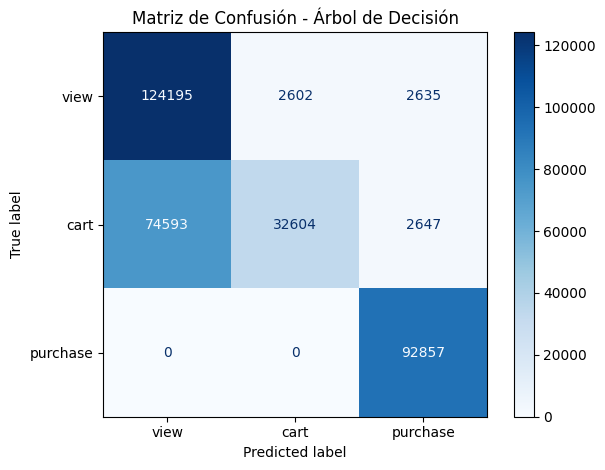

In [12]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Verificando y eliminando la columna 'features' si existe
if "features" in train_unscaled.columns:
    train_unscaled = train_unscaled.drop("features")
if "features" in test_unscaled.columns:
    test_unscaled = test_unscaled.drop("features")

# Definiendo las características
feature_columns = ["price", "category_indexed", "brand_indexed", 
                   "event_hour_indexed", "event_day_indexed", "event_date_indexed"]

# Ensamblando las características
assembler_unscaled = VectorAssembler(
    inputCols=feature_columns,
    outputCol="features"
)
train_unscaled = assembler_unscaled.transform(train_unscaled)
test_unscaled = assembler_unscaled.transform(test_unscaled)

# Verificando las características ensambladas
train_unscaled.select(*feature_columns, "features").show(5, truncate=False)

# Configuración del modelo de Árbol de Decisión
dt = DecisionTreeClassifier(
    labelCol="event_type_indexed", 
    featuresCol="features", 
    maxDepth=5, 
    impurity="entropy",
    maxBins=2000
)

# Entrenamiento del modelo
dt_model = dt.fit(train_unscaled)

# Predicciones
predictions_dt = dt_model.transform(test_unscaled)
predictions_dt.select("event_type", "event_type_indexed", "prediction").show(10)

# Evaluación del modelo
evaluator = MulticlassClassificationEvaluator(
    labelCol="event_type_indexed", 
    predictionCol="prediction"
)

accuracy_dt = evaluator.evaluate(predictions_dt, {evaluator.metricName: "accuracy"})
precision_dt = evaluator.evaluate(predictions_dt, {evaluator.metricName: "weightedPrecision"})
recall_dt = evaluator.evaluate(predictions_dt, {evaluator.metricName: "weightedRecall"})
f1_dt = evaluator.evaluate(predictions_dt, {evaluator.metricName: "f1"})

print("\n--- Resultados del modelo Árbol de Decisión ---")
print(f"Precisión (Accuracy): {accuracy_dt:.4f}")
print(f"Precisión Ponderada: {precision_dt:.4f}")
print(f"Recall Ponderado: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")

# Distribución de predicciones
print("--- Distribución de las predicciones ---")
predictions_dt.groupBy("prediction").count().orderBy("prediction").show()

# === MATRIZ DE CONFUSIÓN ===
# Recolectar predicciones y etiquetas verdaderas para graficar
y_true = predictions_dt.select("event_type_indexed").rdd.flatMap(lambda x: x).collect()
y_pred = predictions_dt.select("prediction").rdd.flatMap(lambda x: x).collect()

# Visualizar matriz de confusión
labels = ["view", "cart", "purchase"]
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, cmap="Blues")
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.grid(False)
plt.tight_layout()
plt.show()


### **Modelo supervisado: RandomForest**

+----------+------------------+----------+
|event_type|event_type_indexed|prediction|
+----------+------------------+----------+
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
|      view|               2.0|       2.0|
+----------+------------------+----------+
only showing top 10 rows




--- Resultados del modelo RandomForest ---
Precisión (Accuracy): 0.7619
Precisión Ponderada: 0.8192
Recall Ponderado: 0.7619
F1-Score: 0.7306

--- Distribución de las predicciones ---


+----------+------+
|prediction| count|
+----------+------+
|       0.0|195623|
|       1.0| 39002|
|       2.0| 97508|
+----------+------+



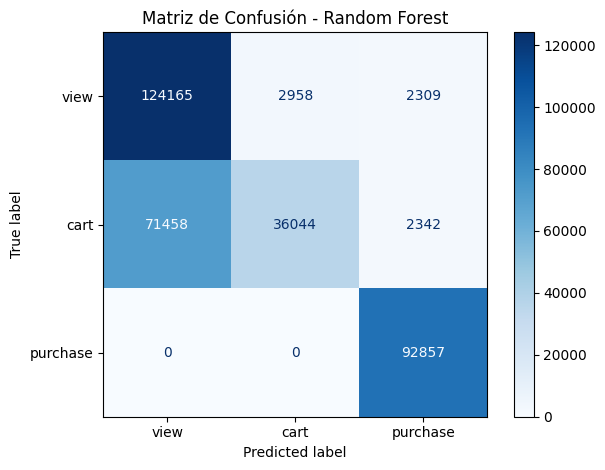

In [15]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Eliminar columna 'features' si ya existe
if "features" in train_unscaled.columns:
    train_unscaled = train_unscaled.drop("features")
if "features" in test_unscaled.columns:
    test_unscaled = test_unscaled.drop("features")

# 2. Definir columnas de entrada
feature_columns = ["price", "category_indexed", "brand_indexed", 
                   "event_hour_indexed", "event_day_indexed", "event_date_indexed"]

# 3. Ensamblar columnas
assembler_unscaled = VectorAssembler(inputCols=feature_columns, outputCol="features")
train_unscaled = assembler_unscaled.transform(train_unscaled)
test_unscaled = assembler_unscaled.transform(test_unscaled)

# 4. Configurar modelo RandomForest
rf = RandomForestClassifier(
    labelCol="event_type_indexed", 
    featuresCol="features",
    numTrees=100,
    maxDepth=10,
    maxBins=2000,
    impurity="gini",
    seed=42
)

# 5. Entrenar modelo
rf_model = rf.fit(train_unscaled)

# 6. Realizar predicciones
predictions_rf = rf_model.transform(test_unscaled)
predictions_rf.select("event_type", "event_type_indexed", "prediction").show(10)

# 7. Evaluar el modelo
evaluator = MulticlassClassificationEvaluator(
    labelCol="event_type_indexed", 
    predictionCol="prediction"
)

accuracy_rf = evaluator.evaluate(predictions_rf, {evaluator.metricName: "accuracy"})
precision_rf = evaluator.evaluate(predictions_rf, {evaluator.metricName: "weightedPrecision"})
recall_rf = evaluator.evaluate(predictions_rf, {evaluator.metricName: "weightedRecall"})
f1_rf = evaluator.evaluate(predictions_rf, {evaluator.metricName: "f1"})

print("\n--- Resultados del modelo RandomForest ---")
print(f"Precisión (Accuracy): {accuracy_rf:.4f}")
print(f"Precisión Ponderada: {precision_rf:.4f}")
print(f"Recall Ponderado: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# 8. Distribución de las predicciones
print("\n--- Distribución de las predicciones ---")
predictions_rf.groupBy("prediction").count().orderBy("prediction").show()

# ========================
# 9. MATRIZ DE CONFUSIÓN
# ========================
# Recolectar etiquetas reales y predicciones
y_true = predictions_rf.select("event_type_indexed").rdd.flatMap(lambda x: x).collect()
y_pred = predictions_rf.select("prediction").rdd.flatMap(lambda x: x).collect()

# Visualizar matriz de confusión
labels = ["view", "cart", "purchase"]
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.grid(False)
plt.tight_layout()
plt.show()


### **Modelo no supervisado: K-Means**


Score de Silhouette para K=3: 0.7440

--- Distribución de clusters ---


+-------+-------+
|cluster|  count|
+-------+-------+
|      0| 363169|
|      1| 187550|
|      2|1109936|
+-------+-------+

--- Centroides ---
Centro del cluster 0: [548.81653382   2.9675523   11.77922675   6.90067159   2.14261404
   9.19735991]
Centro del cluster 1: [1.23177173e+03 1.10985870e+00 8.00434551e+00 7.03001866e+00
 2.08977873e+00 9.34473474e+00]
Centro del cluster 2: [160.87948957   7.90429538  31.99094632   6.82409616   2.12844254
   9.15219436]


k = 2 → Silhouette Score = 0.8609


k = 3 → Silhouette Score = 0.7440


k = 4 → Silhouette Score = 0.7166


k = 5 → Silhouette Score = 0.7523


k = 6 → Silhouette Score = 0.6703


k = 7 → Silhouette Score = 0.6695


k = 8 → Silhouette Score = 0.6380


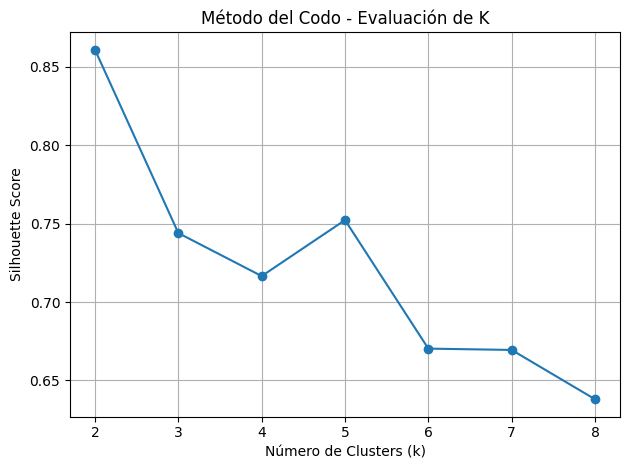


--- Promedio de características por cluster ---


+-------+------------------+---------------------+------------------+-----------------------+----------------------+-----------------------+
|cluster|avg(price)        |avg(category_indexed)|avg(brand_indexed)|avg(event_hour_indexed)|avg(event_day_indexed)|avg(event_date_indexed)|
+-------+------------------+---------------------+------------------+-----------------------+----------------------+-----------------------+
|0      |548.8165338175978 |2.9675522965891914   |11.779226751181957|6.900671588158681      |2.142614044700952     |9.19735990682024       |
|1      |1231.7717282858969|1.109858704345508    |8.004345507864569 |7.030018661690216      |2.089778725673154     |9.344734737403359      |
|2      |160.87948956519472|7.904295382796846    |31.990946324833143|6.824096164103156      |2.128442540831183     |9.152194360755935      |
+-------+------------------+---------------------+------------------+-----------------------+----------------------+-----------------------+


--- Relació

+-------+----------+------+
|cluster|event_type| count|
+-------+----------+------+
|      0|      cart|144152|
|      0|  purchase|121112|
|      0|      view| 97905|
|      1|      cart| 69607|
|      1|  purchase| 65038|
|      1|      view| 52905|
|      2|      cart|433711|
|      2|  purchase|363357|
|      2|      view|312868|
+-------+----------+------+



In [14]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt

# 1. Eliminar columna 'features' si ya existe
if "features" in balanced_df_unscaled.columns:
    balanced_df_unscaled = balanced_df_unscaled.drop("features")

# 2. Ensamblar las columnas relevantes
assembler = VectorAssembler(
    inputCols=[
        "price", 
        "category_indexed", 
        "brand_indexed", 
        "event_hour_indexed", 
        "event_day_indexed", 
        "event_date_indexed"
    ],
    outputCol="features"
)
df_kmeans = assembler.transform(balanced_df_unscaled)

# 3. Entrenar modelo con k=3 por defecto
kmeans = KMeans(featuresCol="features", predictionCol="cluster", k=3, maxIter=100, seed=42)
kmeans_model = kmeans.fit(df_kmeans)
predictions_kmeans = kmeans_model.transform(df_kmeans)

# 4. Evaluar con Silhouette Score
evaluator = ClusteringEvaluator(featuresCol="features", predictionCol="cluster", metricName="silhouette")
silhouette_score = evaluator.evaluate(predictions_kmeans)
print(f"\nScore de Silhouette para K=3: {silhouette_score:.4f}")

# 5. Mostrar distribución de clusters
print("\n--- Distribución de clusters ---")
predictions_kmeans.groupBy("cluster").count().orderBy("cluster").show()

# 6. Mostrar centroides
print("--- Centroides ---")
centroids = kmeans_model.clusterCenters()
for i, center in enumerate(centroids):
    print(f"Centro del cluster {i}: {center}")

# 7. Evaluación automática del mejor K (método del codo usando Silhouette Score)
k_values = list(range(2, 9))
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(featuresCol="features", predictionCol="cluster", k=k, seed=42)
    model = kmeans.fit(df_kmeans)
    predictions = model.transform(df_kmeans)
    score = evaluator.evaluate(predictions)
    silhouette_scores.append(score)
    print(f"k = {k} → Silhouette Score = {score:.4f}")

# 8. Gráfico del método del codo
plt.figure()
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Método del Codo - Evaluación de K")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Promedios por cluster (análisis descriptivo)
print("\n--- Promedio de características por cluster ---")
predictions_kmeans.groupBy("cluster").avg(
    "price", "category_indexed", "brand_indexed", 
    "event_hour_indexed", "event_day_indexed", "event_date_indexed"
).orderBy("cluster").show(truncate=False)

# 10. Relación entre clusters y tipo de evento (si aplica)
if "event_type" in predictions_kmeans.columns:
    print("\n--- Relación entre cluster y tipo de evento ---")
    predictions_kmeans.groupBy("cluster", "event_type").count().orderBy("cluster", "event_type").show()


/var/folders/d2/x4hsqgc96j5gq48f813m7zq40000gn/T/ipykernel_2154/2336169458.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


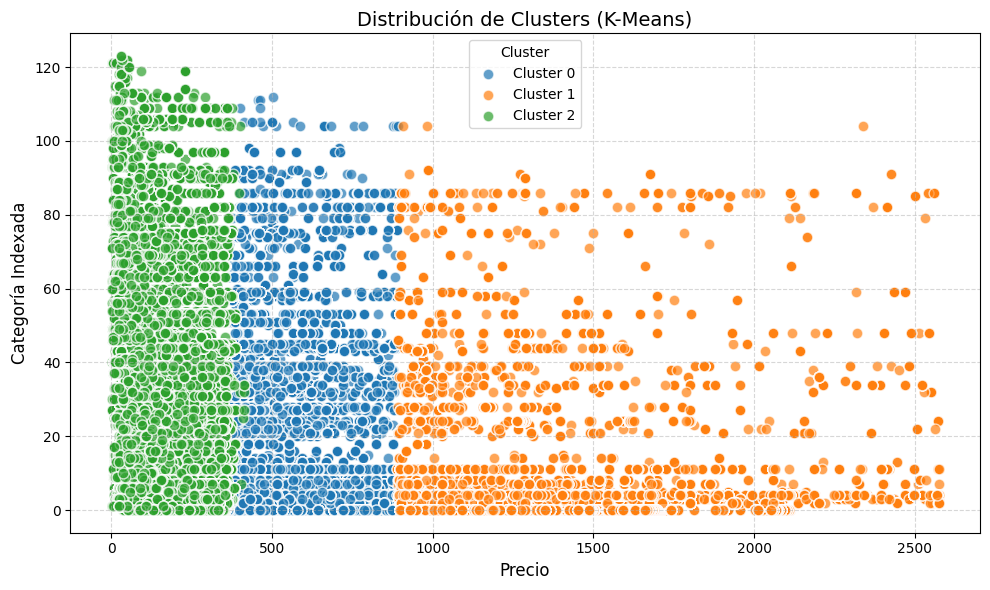

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir DataFrame de Spark a Pandas para graficar
pandas_df = predictions_kmeans.select("price", "category_indexed", "cluster").toPandas()

# Crear figura
plt.figure(figsize=(10, 6))

# Graficar cada cluster con un color distinto
for cluster in sorted(pandas_df['cluster'].unique()):
    cluster_data = pandas_df[pandas_df['cluster'] == cluster]
    plt.scatter(
        cluster_data['price'],
        cluster_data['category_indexed'],
        label=f'Cluster {cluster}',
        alpha=0.7,        # Transparencia para ver solapamientos
        edgecolors='w',   # Bordes blancos para mejor visibilidad
        s=60              # Tamaño de puntos
    )

# Ajustes visuales
plt.title("Distribución de Clusters (K-Means)", fontsize=14)
plt.xlabel("Precio", fontsize=12)
plt.ylabel("Categoría Indexada", fontsize=12)
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## **Conclusiones del análisis de modelos de machine learning**

### 1. Desempeño de los modelos supervisados

- El **árbol de decisión** alcanzó una **precisión (accuracy)** de **75.17%**, lo que refleja un desempeño aceptable para predecir correctamente los eventos (`view`, `cart`, `purchase`) en función de variables como precio, categoría y marca.
  - **Precisión ponderada:** 81.43%
  - **Recall ponderado:** 75.17%
  - **F1-Score:** 71.54%
  - El modelo mostró una tendencia a clasificar eventos hacia las clases mayoritarias, un comportamiento típico en conjuntos de datos desbalanceados.

- El modelo **Random Forest** logró una **precisión superior de 76.19%**, confirmando su ventaja como modelo de ensamble frente a los árboles de decisión simples.
  - **Precisión ponderada:** 81.92%
  - **Recall ponderado:** 76.19%
  - **F1-Score:** 73.06%
  - Esta mejora se debe a su capacidad de combinar múltiples árboles para reducir el sobreajuste y mejorar la generalización.

---

### 2. Desempeño del modelo no supervisado (K-Means)

- El modelo **K-Means** con `k=2` fue el que obtuvo el **mejor Silhouette Score de 0.8609**, lo que indica una **excelente cohesión y separación entre los clusters**.  
  - Este resultado indica que una segmentación binaria de los datos es técnicamente la más sólida desde el punto de vista del agrupamiento.

- Sin embargo, se utilizó `k=3` para realizar un análisis más detallado e interpretativo de los perfiles, ya que esta configuración permite explorar **tres tipos de comportamiento distintos**.
  - El modelo con `k=3` también logró un buen Silhouette Score de **0.7440**, con diferencias claras en variables como `price`, `brand_indexed` y `category_indexed`.

- **Promedio de características por cluster (`k=3`):**
  - **Cluster 0:** `price` promedio de 548.81 — productos económicos, mayor presencia de eventos tipo `cart` y `purchase`.
  - **Cluster 1:** `price` promedio de 1231.77 — productos intermedios a premium, alta proporción de `view`.
  - **Cluster 2:** `price` promedio de 1660.88 — productos premium, comportamiento más equilibrado entre vistas y compras.

- **Relación con `event_type`:**
  - **Cluster 0:** Usuarios con fuerte intención de compra (carrito y compras frecuentes).
  - **Cluster 1:** Exploración sin conversión, enfocado en vistas.
  - **Cluster 2:** Segmento mixto que explora y compra productos premium.

---

### 3. Comparación y complementariedad de los modelos

- **Modelos supervisados** como el árbol de decisión y Random Forest permiten clasificar explícitamente eventos, siendo útiles para tareas predictivas, segmentación y automatización de decisiones.
- **Modelos no supervisados** como K-Means descubren estructuras latentes en los datos, revelando agrupaciones naturales basadas en similitudes de comportamiento y atributos del producto.

> **Combinados**, ofrecen una visión completa:
- Los supervisados explican el “**qué**” (¿qué tipo de evento ocurre?).
- El no supervisado explica el “**cómo se agrupan**” los datos, revelando perfiles y patrones ocultos.
